In [2]:
#(1)LOADING DATA
#Import libraries
import pandas as pd
import numpy as np

In [3]:
#Load data files
train = pd.read_csv("loan1.csv")
test = pd.read_csv("loan2.csv")

In [4]:
#List of column names

list(train)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [5]:
#Sample of data

train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [6]:
train.shape

(614, 13)

In [7]:
#Types of data columns

train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
#Summary statistics for numerical variables 

train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

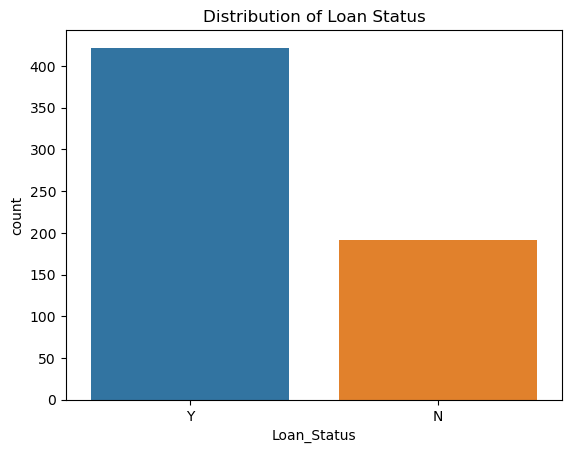

In [11]:
# Distribution of the target variable
sns.countplot(x='Loan_Status', data=train)
plt.title('Distribution of Loan Status')
plt.show()

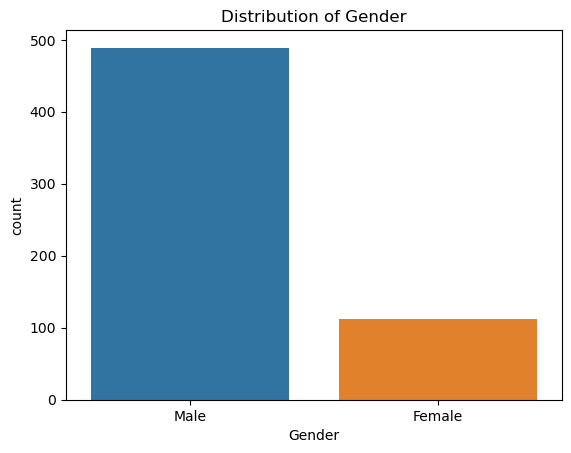

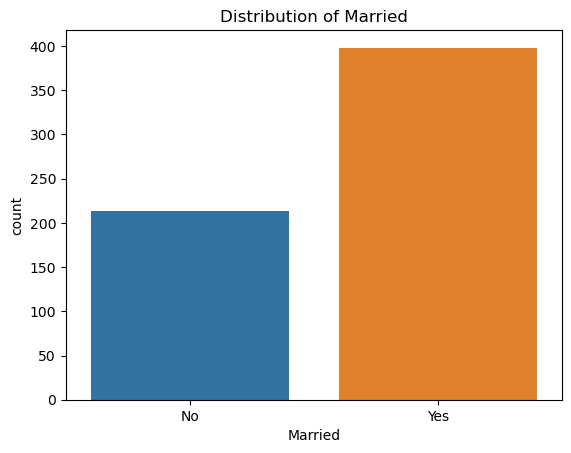

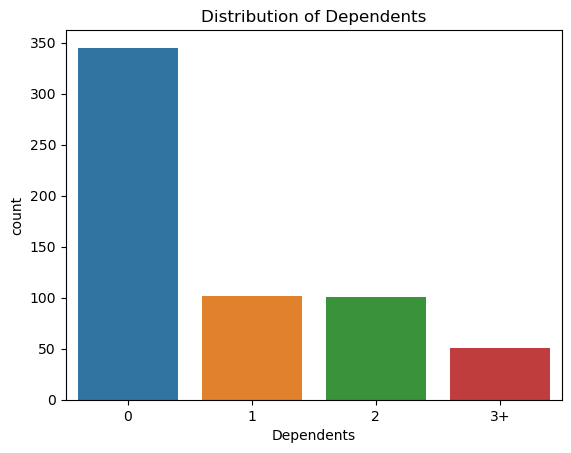

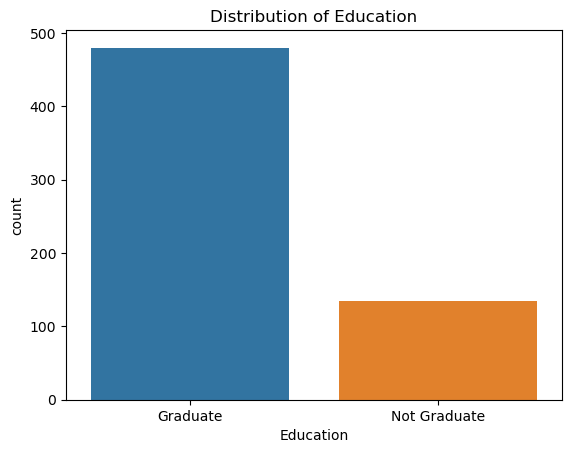

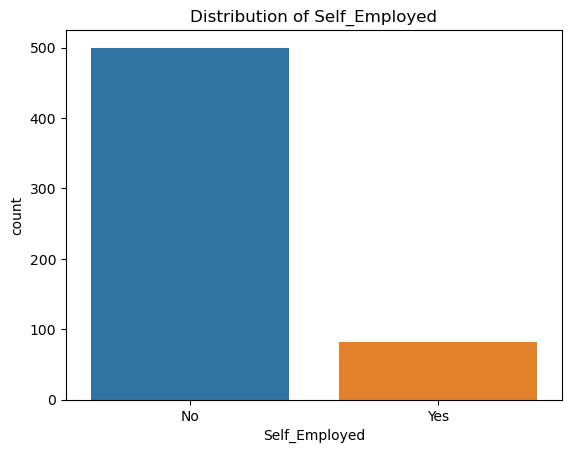

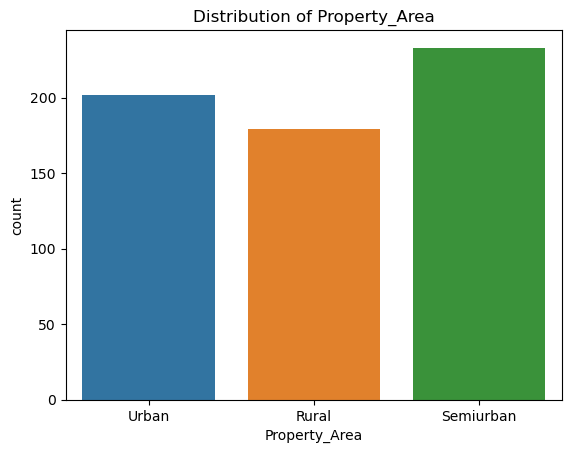

In [12]:
# Distribution of categorical variables
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for col in categorical_cols:
    sns.countplot(x=col, data=train)
    plt.title(f'Distribution of {col}')
    plt.show()

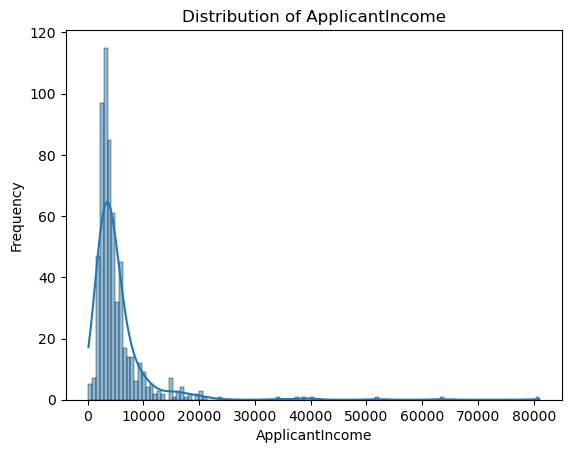

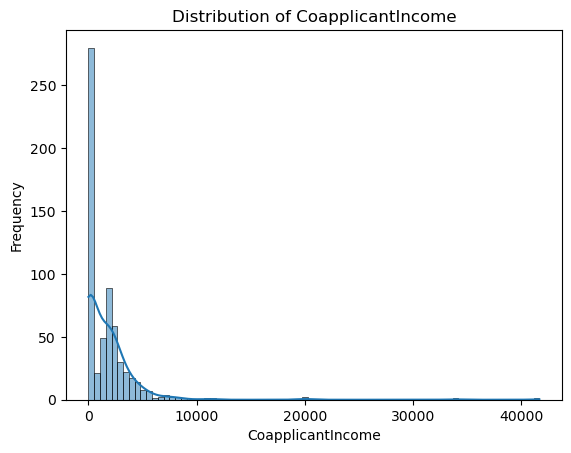

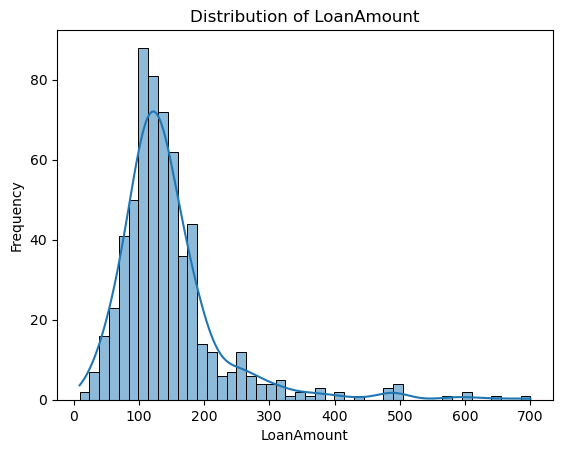

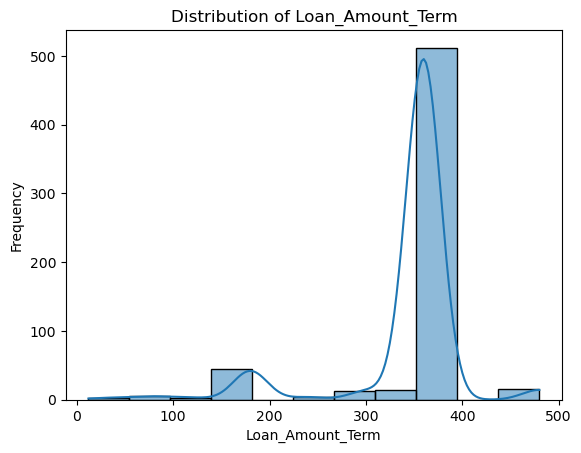

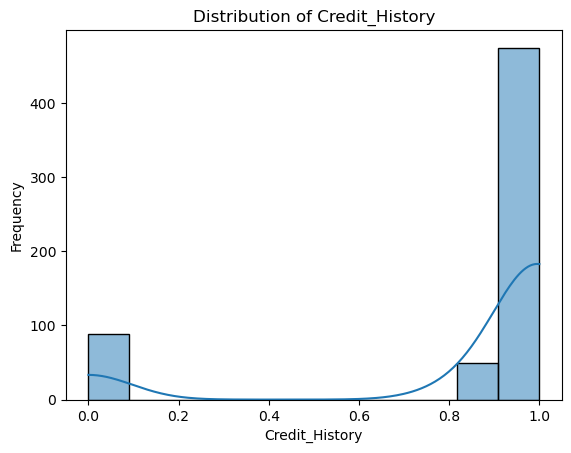

In [13]:
# Distribution of numerical variables
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for col in numerical_cols:
    sns.histplot(train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

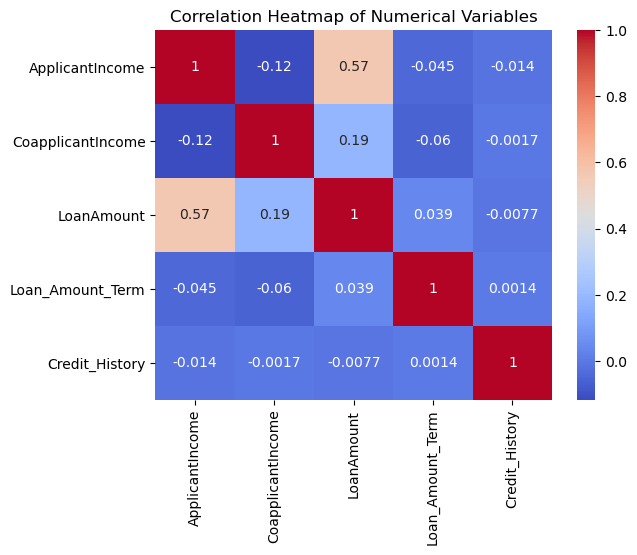

In [14]:
# Correlation heatmap of numerical variables
correlation_matrix = train[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

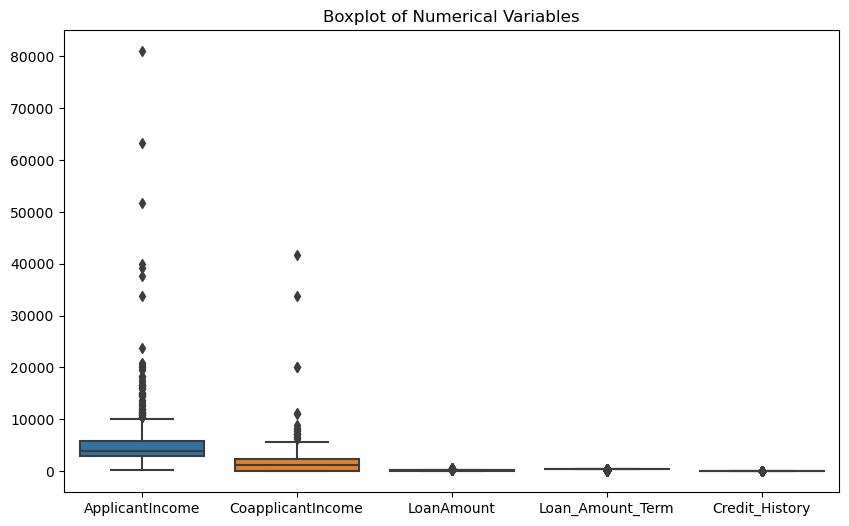

In [15]:
# Boxplot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=train[numerical_cols])
plt.title('Boxplot of Numerical Variables')
plt.show()

In [17]:
#(2)DATA CLEANING AND PREPROCESSING
#Find missing values
train.isnull().sum()
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [9]:
#Impute missing values with mean (numerical variables)

train.fillna(train.mean(),inplace=True) 
train.isnull().sum()
train.shape

C:\Users\Uday\AppData\Local\Temp\ipykernel_3616\2056456316.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.fillna(train.mean(),inplace=True)


(614, 13)

In [19]:
#Test data

test.fillna(test.mean(),inplace=True) 
test.isnull().sum()

C:\Users\Uday\AppData\Local\Temp\ipykernel_10324\188074433.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.fillna(test.mean(),inplace=True)


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [20]:
#Impute missing values with mode (categorical variables)

train.Gender.fillna(train.Gender.mode()[0],inplace=True)
train.Married.fillna(train.Married.mode()[0],inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0],inplace=True) 
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True)  
train.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
#Test data
test.Gender.fillna(test.Gender.mode()[0],inplace=True)
test.Dependents.fillna(test.Dependents.mode()[0],inplace=True) 
test.Self_Employed.fillna(test.Self_Employed.mode()[0],inplace=True)  
test.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [22]:
#Treatment of outliers
train.Loan_Amount_Term=np.log(train.Loan_Amount_Term)

In [23]:
#(3)PREDICTIVE MODELLING
#Remove Loan_ID variable - Irrelevant
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [24]:
#Create target variable

X=train.drop('Loan_Status',1)
y=train.Loan_Status

C:\Users\Uday\AppData\Local\Temp\ipykernel_10324\1707263849.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=train.drop('Loan_Status',1)


In [25]:
#Build dummy variables for categorical variables

X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)


In [26]:
#Split train data for cross validation
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.2)


In [27]:
# (a) NAIVE BAYES ALGORITHM
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB 
nb=GaussianNB()
nb.fit(x_train,y_train)

#Predict values for cv data
pred_cv4=nb.predict(x_cv)

#Evaluate accuracy of model
accuracy_score(y_cv,pred_cv4) 



0.8130081300813008

In [28]:
# (b) DECISION TREE ALGORITHM
#Fit model
from sklearn import tree
dt=tree.DecisionTreeClassifier(criterion='gini')
dt.fit(x_train,y_train)

#Predict values for cv data
pred_cv1=dt.predict(x_cv)

#Evaluate accuracy of model
accuracy_score(y_cv,pred_cv1) 
# matrix1=confusion_matrix(y_cv,pred_cv1)
# print(matrix1)

0.7886178861788617

In [29]:
# (c) GRADIENT BOOSTING MACHINE ALGORITHM
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm.fit(x_train,y_train)

#Predict values for cv data
pred_cv6=gbm.predict(x_cv)

#Evaluate accuracy of model
accuracy_score(y_cv,pred_cv6)

0.7723577235772358

In [30]:
matrix4=confusion_matrix(y_cv,pred_cv4)
print(matrix4)

[[17 19]
 [ 4 83]]


In [32]:
# (d) LOGISTIC REGRESSION ALGORITHM
#Fit model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

#Predict values for cv data
pred_cv=model.predict(x_cv)

#Evaluate accuracy of model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy_score(y_cv,pred_cv)

0.8130081300813008

In [33]:
matrix=confusion_matrix(y_cv,pred_cv)
print(matrix)

[[15 21]
 [ 2 85]]


In [41]:
#(e) RANDOM FOREST ALGORITHM
#Fit model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

#Predict values for cv data
pred_cv2=rf.predict(x_cv)

#Evaluate accuracy of model
accuracy_score(y_cv,pred_cv2)

0.8048780487804879

In [42]:
matrix2=confusion_matrix(y_cv,pred_cv2)
print(matrix2)

[[17 19]
 [ 5 82]]


In [43]:
#(f) SUPPORT VECTOR MACHINE (SVM) ALGORITHM
from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(x_train,y_train)

#Predict values for cv data
pred_cv3=svm_model.predict(x_cv)

#Evaluate accuracy of model
accuracy_score(y_cv,pred_cv3)

0.7073170731707317

In [44]:
matrix3=confusion_matrix(y_cv,pred_cv3)
print(matrix3)


[[ 1 35]
 [ 1 86]]


In [37]:
#Predict values using test data (Naive Bayes)
pred_test=nb.predict(test)


In [38]:
#Write test results in csv file

predictions=pd.DataFrame(pred_test, columns=['predictions']).to_csv('Credit_Predictions.csv')